In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [ ]:
df = pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/DSMarket/df_final_PK")


In [ ]:
df.head()

,id,item,category,department,store,store_code,region,sales_total,yearweek,sell_price,date,Revenue
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,600,2013-28,12.74,2013-07-15,"7,644.84"
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,493,2011-25,5.28,2011-06-20,"2,603.09"
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,288,2014-05,3.95,2014-02-03,"1,137.63"
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,3288,2011-10,5.77,2011-03-07,"18,978.99"
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,1849,2011-21,3.96,2011-05-23,"7,328.33"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           30490 non-null  object        
 1   item         30490 non-null  object        
 2   category     30490 non-null  object        
 3   department   30490 non-null  object        
 4   store        30490 non-null  object        
 5   store_code   30490 non-null  object        
 6   region       30490 non-null  object        
 7   sales_total  30490 non-null  int64         
 8   yearweek     30490 non-null  object        
 9   sell_price   30490 non-null  float64       
 10  date         30490 non-null  datetime64[ns]
 11  Revenue      30490 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 2.8+ MB


In [ ]:
df['store'].value_counts()

store
Greenwich_Village    3049
Harlem               3049
Tribeca              3049
Brooklyn             3049
South_End            3049
Roxbury              3049
Back_Bay             3049
Midtown_Village      3049
Yorktown             3049
Queen_Village        3049
Name: count, dtype: int64

In [ ]:
##posibles nuevas variables:
'''
-max_venta
-min_venta
-mean_venta
-fecha ultima compra
-mes_compra
-compra por semanas
-agrupando por ventas podemos sacar por ejem, los 15 items mas populares:
most_important_item = df.groupby(['item'])['sales_total'].size().sort_values().tail(15).index.tolist()
df['top_items']=df['item'].isin(most_important_item)
- agrupar los items por sell_price por fecha para ver como cambia a lo largo tiempo
##sell_price_evolution= df.groupby(['item', 'date'])['sell_price'].size().sort_values().tail(15).index.tolist()
df["sell_price_evolution"] = df.groupby(['item', 'date'])['sell_price'].transform(np.mean)
df["sell_price_evolution"] = df.groupby(['item', 'date'])['sales_total'].transform(np.sum)

-agrupando podemos sacar el weekday que mas se vende un item
'''

'\n-max_venta\n-min_venta\n-mean_venta\n-fecha ultima compra\n-mes_compra\n-compra por semanas\n-agrupando por ventas podemos sacar por ejem, los 15 items mas populares:\nmost_important_item = df.groupby([\'item\'])[\'sales_total\'].size().sort_values().tail(15).index.tolist()\ndf[\'top_items\']=df[\'item\'].isin(most_important_item)\n- agrupar los items por sell_price por fecha para ver como cambia a lo largo tiempo\n##sell_price_evolution= df.groupby([\'item\', \'date\'])[\'sell_price\'].size().sort_values().tail(15).index.tolist()\ndf["sell_price_evolution"] = df.groupby([\'item\', \'date\'])[\'sell_price\'].transform(np.mean)\ndf["sell_price_evolution"] = df.groupby([\'item\', \'date\'])[\'sales_total\'].transform(np.sum)\n\n-agrupando podemos sacar el weekday que mas se vende un item\n'

In [ ]:
most_important_store = df.groupby(['store'])['sales_total'].size().sort_values().tail(3).index.tolist()


In [ ]:
df['top_store']=df['store'].isin(most_important_store)


In [ ]:
df['top_store'].value_counts()

top_store
False    21343
True      9147
Name: count, dtype: int64

In [ ]:
less_important_store = df.groupby(['store'])['sales_total'].size().sort_values().head(3).index.tolist()
df['less_store']=df['store'].isin(less_important_store)


In [ ]:
df['less_store'].value_counts()

less_store
False    21343
True      9147
Name: count, dtype: int64

In [ ]:
df["sales_store_category_sum"] = df.groupby(['store', 'category'])['sales_total'].transform(np.sum)


In [ ]:
df["revenue_store_category_mean"] = df.groupby(['store', 'category'])['Revenue'].transform(np.mean)


In [ ]:
df["sales_store_region_sum"] = df.groupby(['store', 'region'])['sales_total'].transform(np.sum)


In [ ]:
df["revenue_store_region_mean"] = df.groupby(['store', 'region'])['Revenue'].transform(np.mean)


In [ ]:
df["sell_price_evolution_mean"] = df.groupby(['store', 'date'])['sell_price'].transform(np.mean)


In [ ]:
df['sell_price_evolution_mean']. nunique()

2131

In [ ]:
df['sell_price'].nunique()

1031

In [ ]:
df.tail(3)

,id,item,category,department,store,store_code,region,sales_total,yearweek,sell_price,date,Revenue,top_store,less_store,sales_store_category_sum,revenue_store_category_mean,sales_store_region_sum,revenue_store_region_mean,sell_price_evolution_mean
30487,SUPERMARKET_3_825_PHI_3,SUPERMARKET_3_825,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,1712,2011-05,4.80,2011-01-31,"8,217.60",False,False,4730680,"8,773.64",6427782,"6,683.72",4.94
30488,SUPERMARKET_3_826_PHI_3,SUPERMARKET_3_826,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,702,2013-34,1.54,2013-08-26,"1,078.27",False,False,4730680,"8,773.64",6427782,"6,683.72",2.55
30489,SUPERMARKET_3_827_PHI_3,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,1329,2014-09,1.20,2014-03-03,"1,594.80",False,False,4730680,"8,773.64",6427782,"6,683.72",8.40


In [ ]:
aggregated_Revenue = df.groupby('store').agg(
    max_Revenue = ('Revenue', 'max'),
    min_Revenue = ('Revenue', 'min'),
    mean_Revenue = ('Revenue', 'mean')

)

In [ ]:
df = pd.merge(df, aggregated_Revenue, on = 'store')


In [ ]:
df.head(3)

,id,item,category,department,store,store_code,region,sales_total,yearweek,sell_price,date,Revenue,top_store,less_store,sales_store_category_sum,revenue_store_category_mean,sales_store_region_sum,revenue_store_region_mean,sell_price_evolution_mean,max_Revenue,min_Revenue,mean_Revenue
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,600,2013-28,12.74,2013-07-15,"7,644.84",False,True,876678,"7,227.57",7698216,"8,976.90",7.90,"369,908.42",81.80,"8,976.90"
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,493,2011-25,5.28,2011-06-20,"2,603.09",False,True,876678,"7,227.57",7698216,"8,976.90",4.36,"369,908.42",81.80,"8,976.90"
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,288,2014-05,3.95,2014-02-03,"1,137.63",False,True,876678,"7,227.57",7698216,"8,976.90",2.93,"369,908.42",81.80,"8,976.90"


In [ ]:
df['max_Revenue'].nunique()

10

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           30490 non-null  object        
 1   item                         30490 non-null  object        
 2   category                     30490 non-null  object        
 3   department                   30490 non-null  object        
 4   store                        30490 non-null  object        
 5   store_code                   30490 non-null  object        
 6   region                       30490 non-null  object        
 7   sales_total                  30490 non-null  int64         
 8   yearweek                     30490 non-null  object        
 9   sell_price                   30490 non-null  float64       
 10  date                         30490 non-null  datetime64[ns]
 11  Revenue                      30490 non-nu

In [ ]:
df["month_sale"] = df["date"].dt.month
df["year_sale"] = df["date"].dt.year



In [ ]:
df["sales_total_evolution"] = df.groupby(['store', 'date'])['sales_total'].transform(np.sum)


In [ ]:
df['last_sale_date'] = df['date'].max()


In [ ]:
df['time_since_last_sale'] =\
df['last_sale_date'] - df['date']

In [ ]:
df["time_since_last_sale"] = df["time_since_last_sale"].dt.days

In [ ]:
df.head(3)

,id,item,category,department,store,store_code,region,sales_total,yearweek,sell_price,date,Revenue,top_store,less_store,sales_store_category_sum,revenue_store_category_mean,sales_store_region_sum,revenue_store_region_mean,sell_price_evolution_mean,max_Revenue,min_Revenue,mean_Revenue,month_sale,year_sale,sales_total_evolution,last_sale_date,time_since_last_sale
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,600,2013-28,12.74,2013-07-15,"7,644.84",False,True,876678,"7,227.57",7698216,"8,976.90",7.90,"369,908.42",81.80,"8,976.90",7,2013,8548,2016-02-15,945
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,493,2011-25,5.28,2011-06-20,"2,603.09",False,True,876678,"7,227.57",7698216,"8,976.90",4.36,"369,908.42",81.80,"8,976.90",6,2011,7834,2016-02-15,1701
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,288,2014-05,3.95,2014-02-03,"1,137.63",False,True,876678,"7,227.57",7698216,"8,976.90",2.93,"369,908.42",81.80,"8,976.90",2,2014,4036,2016-02-15,742


In [ ]:
# silence warnings
import warnings
warnings.filterwarnings("ignore")

# operating system
import os

# time calculation to track some processes
import time

# numeric and matrix operations
import numpy as np
import pandas as pd

# loading ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# python core library for machine learning and data science
import sklearn
from sklearn import set_config
set_config(transform_output = "pandas")

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.cluster import KMeans

In [ ]:
print("Working with this sklearn version {}".format(sklearn.__version__))


Working with this sklearn version 1.2.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           30490 non-null  object        
 1   item                         30490 non-null  object        
 2   category                     30490 non-null  object        
 3   department                   30490 non-null  object        
 4   store                        30490 non-null  object        
 5   store_code                   30490 non-null  object        
 6   region                       30490 non-null  object        
 7   sales_total                  30490 non-null  int64         
 8   yearweek                     30490 non-null  object        
 9   sell_price                   30490 non-null  float64       
 10  date                         30490 non-null  datetime64[ns]
 11  Revenue                      30490 non-nu

In [ ]:
df.columns.tolist()

['id',
 'item',
 'category',
 'department',
 'store',
 'store_code',
 'region',
 'sales_total',
 'yearweek',
 'sell_price',
 'date',
 'Revenue',
 'top_store',
 'less_store',
 'sales_store_category_sum',
 'revenue_store_category_mean',
 'sales_store_region_sum',
 'revenue_store_region_mean',
 'sell_price_evolution_mean',
 'max_Revenue',
 'min_Revenue',
 'mean_Revenue',
 'month_sale',
 'year_sale',
 'sales_total_evolution',
 'last_sale_date',
 'time_since_last_sale']

In [ ]:
df.set_index("store", inplace = True)
lc=[
 'sell_price',
 'Revenue',
 'top_store',
 'less_store',
 'sales_store_category_sum',
 'revenue_store_category_mean',
 'sales_store_region_sum',
 'revenue_store_region_mean',
 'sell_price_evolution_mean',
 'max_Revenue',
 'min_Revenue',
 'mean_Revenue',
 'month_sale',
 'year_sale',
 'sales_total_evolution',
 'sales_total',
  'time_since_last_sale']

df = df[lc]

In [ ]:
def build_unique_id_features(X):
    aggregated_df = X.groupby(X.index).agg(
        amount_sales=('Revenue', 'sum'),
        avg_ticket=('Revenue', 'mean'),
        avg_sales =('sales_total_evolution','mean'),
        avg_sell_price = ('sell_price_evolution_mean', 'mean'),


        last_sale = ('time_since_last_sale', 'min'),
        first_sale = ('time_since_last_sale', 'max'),
        month_sales_max =('month_sale', 'mean'),
        year_sales_max = ('year_sale', 'mean'),


        most_popular_store=('top_store', 'sum'),
        less_popular_store=('less_store', 'sum'),
        category_sales =('sales_store_category_sum', 'sum'),
        category_revenue = ('revenue_store_category_mean', 'sum')

    )
    return aggregated_df

In [ ]:
## mean_sales_per_store=X[['store_code_BOS_1', 'store_code_BOS_2', 'store_code_BOS_3', 'store_code_NYC_1', 'store_code_NYC_2', 'store_code_NYC_3', 'store_code_NYC_4', 'store_code_PHI_1', 'store_code_PHI_2', 'store_code_PHI_3']].mean(),
    ##    max_seller_store=X[['store_code_BOS_1', 'store_code_BOS_2', 'store_code_BOS_3', 'store_code_NYC_1', 'store_code_NYC_2', 'store_code_NYC_3', 'store_code_NYC_4', 'store_code_PHI_1', 'store_code_PHI_2', 'store_code_PHI_3']].max()

In [ ]:
ProductIdFeatureGenerator = FunctionTransformer(func = build_unique_id_features)

In [ ]:
# separamos el pipeline del a loop, para no tener que volver a hacer los primeros 3 pasos para cada k de la loop
pipe = Pipeline(steps = [
    ("Imputer", KNNImputer()),
    ("CustomTransformer", ProductIdFeatureGenerator),
    ("RobustScaler", RobustScaler(quantile_range = (0, 99.0)))
])

In [ ]:
df_scaled_transformed = pipe.fit_transform(df)

In [ ]:
sse = {}

for k in range(2, 10):

    print(f"Fitting pipe with {k} clusters")

    clustering_model = KMeans(n_clusters = k)
    clustering_model.fit(df_scaled_transformed)

    sse[k] = clustering_model.inertia_

Fitting pipe with 2 clusters
Fitting pipe with 3 clusters
Fitting pipe with 4 clusters
Fitting pipe with 5 clusters
Fitting pipe with 6 clusters
Fitting pipe with 7 clusters
Fitting pipe with 8 clusters
Fitting pipe with 9 clusters


In [ ]:
#elbow curve

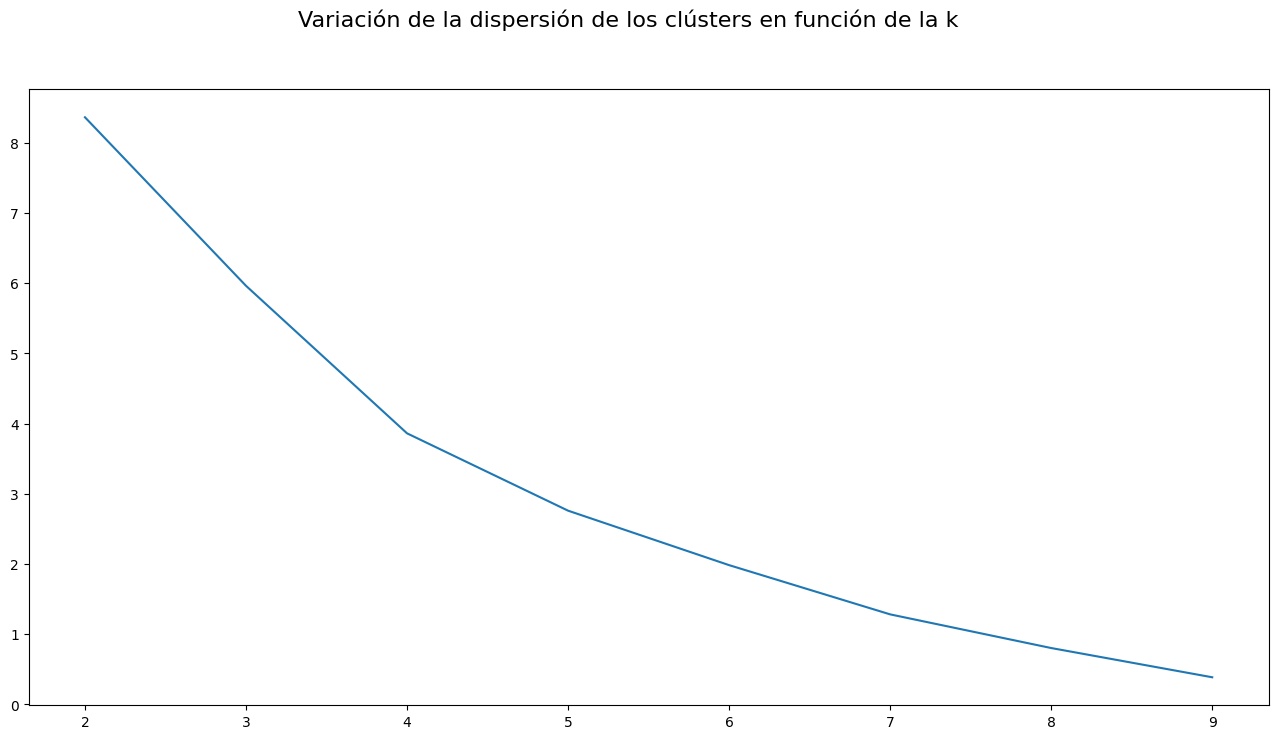

In [ ]:
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot()

x_values = list(sse.keys())
y_values = list(sse.values())

ax.plot(x_values, y_values, label = "Inertia/dispersión de los clústers")
fig.suptitle("Variación de la dispersión de los clústers en función de la k", fontsize = 16);

In [ ]:
pipe = Pipeline(steps = [
    ("Imputer", KNNImputer()),
    ("CustomTransformer", ProductIdFeatureGenerator),
    ("RobustScaler", RobustScaler(quantile_range = (0, 99.0))),
    ("Clustering", KMeans(n_clusters = 4, random_state = 175))
])

In [ ]:
df.shape

(30490, 17)

In [ ]:
pipe.fit(df)


Pipeline(steps=[('Imputer', KNNImputer()),
                ('CustomTransformer',
                 FunctionTransformer(func=<function build_unique_id_features at 0x7cfd299a9000>)),
                ('RobustScaler', RobustScaler(quantile_range=(0, 99.0))),
                ('Clustering', KMeans(n_clusters=4, random_state=175))])

In [ ]:
X_processed = pipe[:2].transform(df)


In [ ]:
labels = pipe.predict(df)


In [ ]:
# le asignamos al DataFrame procesado el clúster.
# si lo hacemos al df escalado será más díficil de interpretar los resultados porque los números están escalados
X_processed["cluster"] = labels

In [ ]:
X_processed.shape


(10, 13)

FICHA


In [ ]:
ficha_df = pd.DataFrame()


In [ ]:
resumen_data_list = []
for i, col in enumerate(["amount_sales", "avg_sell_price","last_sale", "most_popular_store", "less_popular_store"]):
    resumen_data = X_processed[["cluster", col]].groupby("cluster").describe().T[1:]
    resumen_data_list.append(resumen_data)

ficha_df = pd.concat(resumen_data_list, ignore_index=True)


In [ ]:
# generamos nuestro multiindex

out_index = [
    "Monetarios",
    "Evolucion precio",
    "Frecuencia",
    "Mas popularidad",
    "Menos popularidad"

]

inner_index = [
    "Importe",
    "precios",
    "última venta",
    "top ventas",
    "low ventas"


]

estadisticos = ["Media", "Desviación", "Mínimo", "Perc. 25", "Perc. 50", "Perc. 75", "Máximo"]

new_multi_index = []

for oi, ii, in zip(out_index, inner_index):
    for es in estadisticos:
        new_multi_index.append((oi, ii, es))


In [ ]:
def generate_multiindex(list_of_tuples, names):
    return pd.MultiIndex.from_tuples(list_of_tuples, names = names)

In [ ]:
names = ["Grupo Indicadores", "Indicador", "Estadístico"]
index_ficha = generate_multiindex(new_multi_index, names)
ficha_df.set_index(index_ficha, inplace = True)

In [ ]:
ficha_df = ficha_df.rename(columns = {
    0 : "Tiendas premium",
    1 : "De menor stock",
    2 : "Tiendas mas rentables",
    3 : "Tiendas 'marca blanca'",
    4 : "Tiendas menos "
})

In [ ]:
ficha_df.style.background_gradient(cmap = 'Blues', axis = 1)


In [ ]:
# El primer cluster es el que aglutina las tiendas con unos precios más altos y que más han evolucionado(tienda premium),
# El segundo cluster aglutina las tiendas con un menor tiempo de stock(mayor flujo) de los productos,
# El tercer cluster aglutina las tiendas con  mayores ingresos por ventas(solo 1 tienda) y es la mas popular, es decir la que mas vende
# El cuarto cluster aglutina las tiendas con los productos menos populares ventas, las que menos

In [ ]:
(
    X_processed
    .groupby("cluster")
    .describe()
    .T
    .style.background_gradient(cmap = 'Blues', axis = 1)
)

In [65]:
X_processed

,amount_sales,avg_ticket,avg_sales,avg_sell_price,last_sale,first_sale,month_sales_max,year_sales_max,most_popular_store,less_popular_store,category_sales,category_revenue,cluster
store,,,,,,,,,,,,,
Back_Bay,"21,621,715.16","7,091.41","1,276,093.62",5.48,70.00,"1,841.00",3.54,"2,011.88",0.00,"3,049.00","7,744,994,474.00","21,621,715.16",3
Brooklyn,"14,872,474.91","4,877.82","821,029.14",5.50,0.00,"1,841.00",3.60,"2,011.95",0.00,"3,049.00","5,124,057,212.00","14,872,474.91",3
Greenwich_Village,"27,370,555.73","8,976.90","1,861,395.81",5.50,0.00,"1,841.00",3.34,"2,011.85",0.00,"3,049.00","9,735,996,276.00","27,370,555.73",3
Harlem,"21,197,639.72","6,952.33","1,126,352.41",5.51,0.00,"1,841.00",3.81,"2,012.19",0.00,0.00,"7,002,572,289.00","21,197,639.72",0
Midtown_Village,"17,918,743.70","5,876.92","804,837.27",5.51,0.00,"1,841.00",4.37,"2,011.97",0.00,0.00,"6,415,979,722.00","17,918,743.70",0
Queen_Village,"20,378,660.64","6,683.72","1,555,351.92",5.48,119.00,"1,841.00",3.48,"2,011.85",0.00,0.00,"8,349,918,978.00","20,378,660.64",1
Roxbury,"24,771,801.30","8,124.57","1,759,781.11",5.42,21.00,"1,841.00",3.45,"2,011.82",0.00,0.00,"9,202,807,854.00","24,771,801.30",1
South_End,"18,965,575.22","6,220.26","1,286,007.61",5.43,70.00,"1,841.00",3.51,"2,011.82","3,049.00",0.00,"7,124,953,746.00","18,965,575.22",1
Tribeca,"38,954,694.44","12,776.22","2,683,155.39",5.48,0.00,"1,841.00",3.40,"2,011.87","3,049.00",0.00,"14,182,006,106.00","38,954,694.44",2
